$\#\#\#\#\#\#\#$ Libraries $\#\#\#\#\#\#\#$

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
from scipy import stats
from sklearn import metrics
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import pipeline 

import warnings

warnings.filterwarnings('ignore') 

$\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#$

# Data

In [2]:
df = pd.read_csv('DelayedFlights_Mod.csv')

In [3]:
# Transforming data in cyclic for timestamp/timedate built-in functions. 
# we make use of the columns DepTime, CRSDepTime, ArrTime, CRSArrTime to know the hours for the date transformation.
# we can notice that afterwards we can drop these columns.
df['Year'] = 2008 # we add the column of year, previously erased, will be dropped afterwards.
df['DateDep'] = df.DepTime + df.DayofMonth*10000 + df.Month*1000000 + df.Year*100000000
df['DateCRSDep'] = df.CRSDepTime + df.DayofMonth*10000 + df.Month*1000000 + df.Year*100000000
df['DateArr'] = df.ArrTime + df.DayofMonth*10000 + df.Month*1000000 + df.Year*100000000
df['DateCRSArr'] = df.CRSArrTime + df.DayofMonth*10000 + df.Month*1000000 + df.Year*100000000


In [4]:
# we also transform the categorical/object type variable
encode = LabelEncoder()
df['UCarrier_en'] = encode.fit_transform(df['UniqueCarrier'])
df['TailNum_en'] = encode.fit_transform(df['TailNum'])
df['Origin_en'] = encode.fit_transform(df['Origin'])
df['Dest_en'] = encode.fit_transform(df['Dest'])


In [5]:
df.drop(['Unnamed: 0', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 
         'UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'Year'], axis=1, inplace=True)

In [6]:
df2 = df.copy()

**Time up Silhoutte score**

In [21]:
# take some samples and time it out.
n = [1000, 5000, 10000, 50000, 100000, 500000]
timetot = []
#ScSil = []
for j in n:
    dfsam = df2.sample(j)
    
    time0 = time.time()
    #for i in range(2,10):
    
    kmeans = KMeans(n_clusters=2).fit(dfsam)
    labels = kmeans.labels_ 
    
    ScSil = metrics.silhouette_score(dfsam, labels, metric='euclidean')

    time1 = time.time()
    timetot.append(time1 - time0)
    print(timetot)



[0.03783416748046875]
[0.03783416748046875, 0.3558502197265625]
[0.03783416748046875, 0.3558502197265625, 1.2201533317565918]
[0.03783416748046875, 0.3558502197265625, 1.2201533317565918, 26.816701412200928]
[0.03783416748046875, 0.3558502197265625, 1.2201533317565918, 26.816701412200928, 106.95072984695435]
[0.03783416748046875, 0.3558502197265625, 1.2201533317565918, 26.816701412200928, 106.95072984695435, 3481.096295118332]


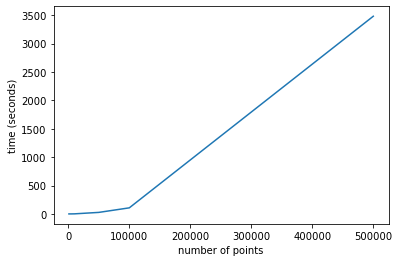

In [22]:
plt.plot(n, timetot)
plt.xlabel('number of points')
plt.ylabel('time (seconds)')
plt.show()

Exponential behaviour when size of the dataset increases.

In [23]:
p = np.polyfit(n, np.log(timetot),1)

In [24]:
p

array([1.78586932e-05, 1.89657555e-02])

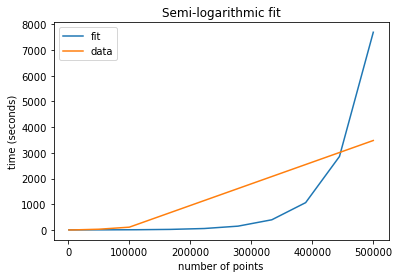

In [29]:
x_fitted = np.linspace(np.min(n), np.max(n), 10)
y_fitted = np.exp(p[1]) * np.exp(p[0]*x_fitted)


line1 = plt.plot(x_fitted, y_fitted)
line2 = plt.plot(n, timetot)
plt.legend(['fit', 'data'])
plt.title('Semi-logarithmic fit')
plt.xlabel('number of points')
plt.ylabel('time (seconds)')
plt.show()

In [30]:
df2.shape[0]

1928368

In [33]:
predict = np.poly1d(p)
num = df2.shape[0]
print('time to run full dataset:', np.exp(predict(num))/3600, 'hours')
print('time to run full dataset:', np.exp(predict(num))/(24*3600), 'days')

time to run full dataset: 255991231364.95645 hours
time to run full dataset: 10666301306.873186 days


In [34]:
print('time to run a 10%: ', np.exp(predict((df2.shape[0]*0.1))), 'seconds')

time to run a 10%:  31.905518711850736 seconds


In [ ]:
# take some samples and time it out.
n = [1000, 5000, 10000, 500000]

timetot = []
ScSil = []

for j in n:
    dfsam = df2.sample(j)
    
    time0 = time.time()
    for i in range(2,7):
    
        kmeans = KMeans(n_clusters=i).fit(dfsam)
        labels = kmeans.labels_ 
    
        ScSil = metrics.silhouette_score(dfsam, labels, metric='euclidean')

    time1 = time.time()
    timetot.append(time1 - time0)
    print(timetot)


[0.32036399841308594]
[0.32036399841308594, 2.821093797683716]
[0.32036399841308594, 2.821093797683716, 8.65586233139038]


Exponential growth with the number of cluster on the system.

In [ ]:
p = np.polyfit(n, np.log(timetot),1)

In [ ]:
x_fitted = np.linspace(np.min(n), np.max(n), 10)
y_fitted = np.exp(p[1]) * np.exp(p[0]*x_fitted)


line1 = plt.plot(x_fitted, y_fitted)
line2 = plt.plot(n, timetot)
plt.legend(['fit', 'data'])
plt.title('Semi-logarithmic fit')
plt.xlabel('number of clusters')
plt.ylabel('time (seconds)')
plt.show()

In [ ]:
predict = np.poly1d(p)
num = 10
predict(num)

**Kmeans using 2 clusters**

If elbow instead is 4 clusters (if I read badly the results =( )

In [7]:
# drop categorical features for later scaling
df2.drop(['FlightNum', 'DateDep', 'DateCRSDep', 'DateArr', 'DateCRSArr', 'UCarrier_en', 'TailNum_en', 'Origin_en', 
         'Dest_en'], axis=1, inplace=True)
df2.columns

Index(['ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'VelocityAir', 'DelayedArr', 'TotalDelayed', 'TaxiTime'],
      dtype='object')

In [9]:
# reduces the system to a 2-d, do pipeline to reduce system:
pipe1 = pipeline.Pipeline([('scaler', RobustScaler()), ('pca', PCA(n_components=2))])

dpca = pipe1.fit_transform(df2)
dpca.shape

(1928368, 2)

In [12]:
# now we run KMeans:
kmeans = KMeans(n_clusters=4, random_state=42).fit(dpca)
label = kmeans.predict(dpca)

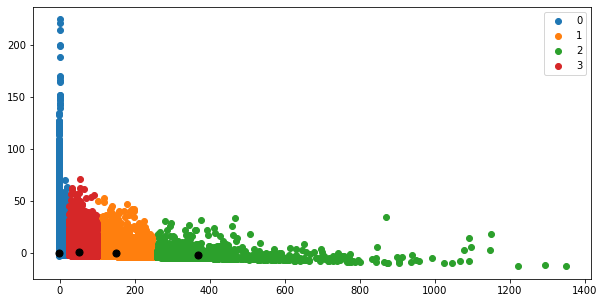

In [13]:
# graph with the labels:
nlabels = np.unique(label)
centroids = kmeans.cluster_centers_

plt.figure(figsize=(10, 5))
for i in nlabels:
    plt.scatter(dpca[label == i , 0] , dpca[label == i , 1] , label = i)
plt.scatter(centroids[:,0], centroids[:,1], s=50, color='k')
plt.legend()
plt.show()

**Without ArrDelay column**

A) Not Scaled:

In [29]:
df4 = df.copy()

In [30]:
# Define the variables X and y
X = np.array(df4.drop(['ArrDelay', 'DelayedArr'], axis=1))
y = np.array(df4['DelayedArr']).reshape(-1,1) 

In [31]:
# 2 cluster kmeans:
kmeans2 = KMeans(n_clusters=2, random_state=42)
# do the fitting:
dfnsc = kmeans2.fit_transform(X)

# predict:
labelNS = kmeans2.predict(X)

# score: we will use accuracy score, since it counts straighforward the values correctly inferred.
print('Accuracy Score:', metrics.accuracy_score(y, labelNS))
# compare the real:
pd.crosstab(y.ravel(), labelNS, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy Score: 0.5548707508110485


Predicted,0,1,All
True,,,
0,84438,93478,177916
1,764895,985557,1750452
All,849333,1079035,1928368


We can see that while it can predict well the delays on the train set, it doesn't predict very well if a flight has been earlier or late, it has predicted a $48\%$ as delayed when it was earlier/on time, and only a $56\%$ of the delays had been predicted correctly.

In [32]:
# score: we will use accuracy score, since it counts straighforward the values correctly inferred.
metrics.accuracy_score(y, labelNS)

0.5548707508110485

centroid coordinates: [[2.18476321e+03 1.33425353e+02 1.34879775e+02 1.08212201e+02
  4.33903557e+01 7.68829009e+02 6.92293482e+00 1.82902171e+01
  1.24641654e+01 2.47367405e+00 9.75217376e+00 5.47394249e-02
  1.59700530e+01 3.16050107e+02 4.07148056e+01 2.52131520e+01
  2.00809624e+11 2.00809624e+11 2.00809624e+11 2.00809624e+11
  1.10476892e+01 2.76152014e+03 1.44610882e+02 1.48658693e+02]
 [2.18392133e+03 1.33211861e+02 1.33660860e+02 1.08328349e+02
  4.28564393e+01 7.61895011e+02 6.72358357e+00 1.81599281e+01
  1.23627528e+01 2.33441084e+00 9.69053089e+00 6.11222064e-02
  1.66751996e+01 3.14579648e+02 4.11240164e+01 2.48835117e+01
  2.00803624e+11 2.00803624e+11 2.00803624e+11 2.00803624e+11
  1.11833713e+01 2.67051884e+03 1.47979320e+02 1.51003526e+02]]


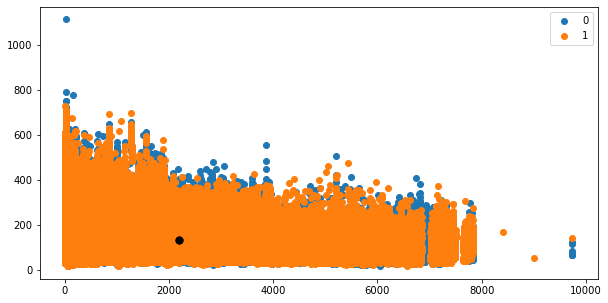

In [33]:
# graph with the labels:
nlabels = np.unique(labelNS)
centroids = kmeans2.cluster_centers_
print('centroid coordinates:', centroids)

plt.figure(figsize=(10, 5))
for i in nlabels:
    plt.scatter(X[labelNS == i , 0] , X[labelNS == i , 1] , label = i)
plt.scatter(centroids[:,0], centroids[:,1], s=50, color='k')
plt.legend()
plt.show()

B) Scaled

In [34]:
# Drop the categorical values for X:

df4.drop(['FlightNum', 'DateDep', 'DateCRSDep', 'DateArr', 'DateCRSArr', 'UCarrier_en', 'TailNum_en', 'Origin_en', 
         'Dest_en'], axis=1, inplace=True)
df4.columns

Index(['ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'VelocityAir', 'DelayedArr', 'TotalDelayed', 'TaxiTime'],
      dtype='object')

In [35]:
# Define the variables X and y
X = np.array(df4.drop(['ArrDelay','DelayedArr'], axis=1))
y = np.array(df4['DelayedArr']).reshape(-1,1) 
X.shape

(1928368, 15)

In [36]:
# Use robust scaler to scale:
X_scaled = RobustScaler().fit_transform(X)

# do the fitting:
dfsc = kmeans2.fit_transform(X_scaled)
# predict:
labelS = kmeans2.predict(X_scaled)

# score: we will use accuracy score, since it counts straighforward the values correctly inferred.
print('Accuracy Score:', metrics.accuracy_score(y, labelS))

# compare the real:
pd.crosstab(y.ravel(), labelS, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy Score: 0.1023342017706164


Predicted,0,1,All
True,,,
0,177916,0,177916
1,1731030,19422,1750452
All,1908946,19422,1928368


Now the algorithm is unable to predict the delayed flights, it predicts around a $1\%$ of the total data as a delayed flight (table above), the accuracy obtained is very low around $10\%$

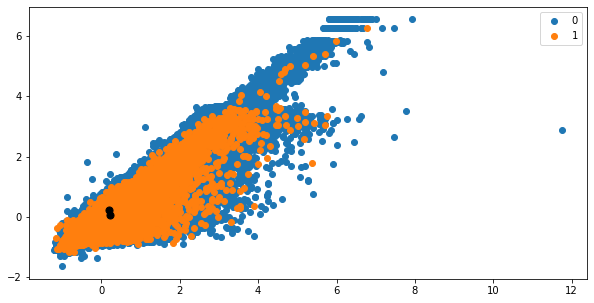

In [37]:
# graph with the labels (test set):
nlabels = np.unique(labelS)
centroids = kmeans2.cluster_centers_

plt.figure(figsize=(10, 5))
for i in nlabels:
    plt.scatter(X_scaled[labelS == i , 0] , X_scaled[labelS == i , 1] , label = i)
plt.scatter(centroids[:,0], centroids[:,1], s=50, color='k')
plt.legend()
plt.show()

Scaling had made that the clusters while overlapping we can distinguish them a bit more, and the centroids had been able to be a bit separated.

C) PCA Scaling

In [38]:
# reduces the system to a 2-d, do pipeline to reduce system:
pipe2 = pipeline.Pipeline([('scaler', RobustScaler()), ('pca', PCA(n_components=2))])

dSpca = pipe2.fit_transform(X)
dSpca.shape

(1928368, 2)

In [39]:
# do the fitting with X_Train:
dfPsc = kmeans2.fit_transform(dSpca)

# first fitting to train algorithm:
labelPS = kmeans2.predict(dSpca)

# score: we will use accuracy score, since it counts straighforward the values correctly inferred.
print('Accuracy Score: ',metrics.accuracy_score(y, labelPS))
# compare the training:
pd.crosstab(y.ravel(), labelPS, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy Score:  0.10256496685279988


Predicted,0,1,All
True,,,
0,177916,0,177916
1,1730585,19867,1750452
All,1908501,19867,1928368


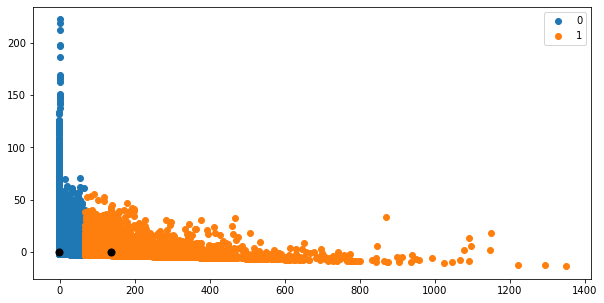

In [40]:
# graph with the labels (test set):
nlabels = np.unique(labelPS)
centroids = kmeans2.cluster_centers_

plt.figure(figsize=(10, 5))
for i in nlabels:
    plt.scatter(dSpca[labelPS == i , 0] , dSpca[labelPS == i , 1] , label = i)
plt.scatter(centroids[:,0], centroids[:,1], s=50, color='k')
plt.legend()
plt.show()

The only difference in the results in which differ when we use PCA apart of standarization, it is on the separation of the clusters and the centroids, as can be see in the figure below. The other results are equally ill predicted as we had them after applying the robust scaler.

**Other  hierarchical clustering algorithms**

Agglomerative clustering overloads the memory fast, the dataset needs to be around 10000 points!

In [17]:
df5sam = df.sample(10000)

In [18]:
# using agglomerative clustering:
agg_clustering = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
 
#predicting the labels
labels = agg_clustering.fit_predict(df5sam)
labels
#metrics.adjusted_rand_score()

array([2, 0, 0, ..., 2, 2, 2])